<a href="https://colab.research.google.com/github/SaiHarshitha-192/Product-Comparison/blob/main/Flipkart_vs_Amazon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Comparision of prices between amazon and flipkart products <br>


> Firstly I've imported the datasets and did some data analysis to remove null values from both the sets<br>
> Then I've done some data visualization between different features of each sets<br>
>After some plots, I've dropped all the columns from both the tables except for product name, retail price and discount price because we only need those ones<br>
>Now both the dataframes are left with two columns each - discount price, retail price and name<br>

>The task is to display the prices in both amazon and flipkart for a particular product.<br>
>So I've merged both tables using joint.merge and then to display the product price which the user asks, I did it in 2 ways:<br>


*   ONE: I took user input of the product name and displayed it 
*   TWO: I made forms where on entering the name of product we get the table


> Then at last I've displayed the least price for a particular product for both websites

##AMAZON

In [1]:
#importing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
amazon = pd.read_csv('/content/drive/MyDrive/amz_com-ecommerce_sample.csv', encoding='latin')
amazon.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,982,438,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32143,29121,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,991,551,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,694,325,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,208,258,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [3]:
#true features of dataset
amazon.shape

(20000, 15)

In [4]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   uniq_id                  20000 non-null  object
 1   crawl_timestamp          20000 non-null  object
 2   product_url              20000 non-null  object
 3   product_name             20000 non-null  object
 4   product_category_tree    20000 non-null  object
 5   pid                      20000 non-null  object
 6   retail_price             20000 non-null  int64 
 7   discounted_price         20000 non-null  int64 
 8   image                    19997 non-null  object
 9   is_FK_Advantage_product  20000 non-null  bool  
 10  description              19998 non-null  object
 11  product_rating           20000 non-null  object
 12  overall_rating           20000 non-null  object
 13  brand                    14136 non-null  object
 14  product_specifications   19986 non-nul

In [5]:
#null values
amazon.isnull().sum()

uniq_id                       0
crawl_timestamp               0
product_url                   0
product_name                  0
product_category_tree         0
pid                           0
retail_price                  0
discounted_price              0
image                         3
is_FK_Advantage_product       0
description                   2
product_rating                0
overall_rating                0
brand                      5864
product_specifications       14
dtype: int64

In [6]:
#removing null values
amazon=amazon.dropna(axis=0)

In [7]:
amazon.shape

(14121, 15)

In [8]:
amazon.isnull().sum()

uniq_id                    0
crawl_timestamp            0
product_url                0
product_name               0
product_category_tree      0
pid                        0
retail_price               0
discounted_price           0
image                      0
is_FK_Advantage_product    0
description                0
product_rating             0
overall_rating             0
brand                      0
product_specifications     0
dtype: int64

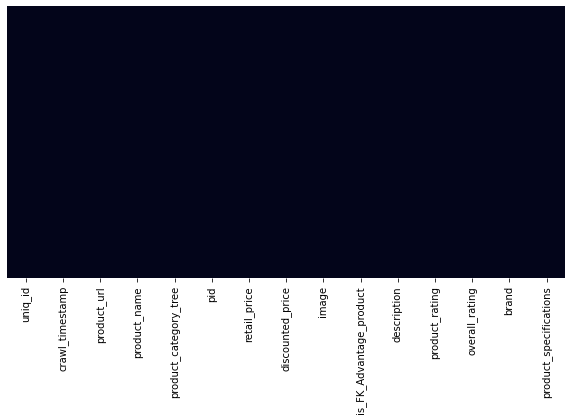

In [9]:
#plot to say no null values are present
plt.figure(figsize=(10,5))
sns.heatmap(amazon.isnull(),cbar=False,yticklabels=False)

##FLIPKART

In [10]:
flipkart = pd.read_csv('/content/drive/MyDrive/flipkart_com-ecommerce_sample.csv')
flipkart.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [11]:
#true features of dataset
flipkart.shape

(20000, 15)

In [12]:
flipkart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  20000 non-null  object 
 1   crawl_timestamp          20000 non-null  object 
 2   product_url              20000 non-null  object 
 3   product_name             20000 non-null  object 
 4   product_category_tree    20000 non-null  object 
 5   pid                      20000 non-null  object 
 6   retail_price             19922 non-null  float64
 7   discounted_price         19922 non-null  float64
 8   image                    19997 non-null  object 
 9   is_FK_Advantage_product  20000 non-null  bool   
 10  description              19998 non-null  object 
 11  product_rating           20000 non-null  object 
 12  overall_rating           20000 non-null  object 
 13  brand                    14136 non-null  object 
 14  product_specifications

In [13]:
#null values in dataset
flipkart.isnull().sum()

uniq_id                       0
crawl_timestamp               0
product_url                   0
product_name                  0
product_category_tree         0
pid                           0
retail_price                 78
discounted_price             78
image                         3
is_FK_Advantage_product       0
description                   2
product_rating                0
overall_rating                0
brand                      5864
product_specifications       14
dtype: int64

In [14]:
#removing null values
flipkart=flipkart.dropna(axis=0)

In [15]:
flipkart.shape

(14058, 15)

In [16]:
flipkart.isnull().sum()

uniq_id                    0
crawl_timestamp            0
product_url                0
product_name               0
product_category_tree      0
pid                        0
retail_price               0
discounted_price           0
image                      0
is_FK_Advantage_product    0
description                0
product_rating             0
overall_rating             0
brand                      0
product_specifications     0
dtype: int64

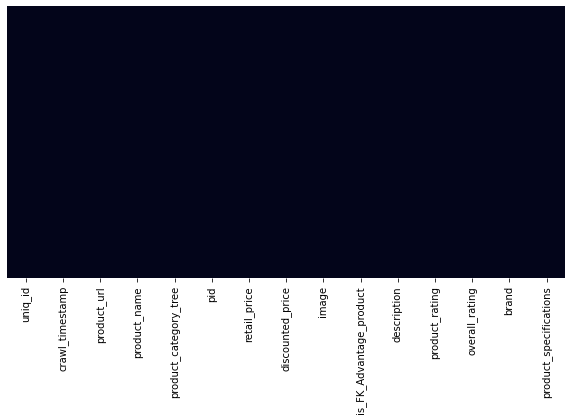

In [17]:
#plot to show no null values
plt.figure(figsize=(10,5))
sns.heatmap(flipkart.isnull(),cbar=False,yticklabels=False)

#Comparing amazon and flipkart dataset

In [18]:
#more about amazon dataset
amazon.describe()

,retail_price,discounted_price
count,14121.000000,14121.000000
mean,3613.789958,2894.159833
std,9254.650945,8371.012632
min,-20.000000,0.000000
25%,686.000000,416.000000
50%,1092.000000,661.000000
75%,2186.000000,1474.000000
max,250483.000000,207175.000000


In [19]:
#more about flipkart dataset
flipkart.describe()

,retail_price,discounted_price
count,14058.000000,14058.000000
mean,3640.462939,2419.567222
std,9272.175892,6949.478890
min,35.000000,35.000000
25%,699.000000,349.000000
50%,1100.000000,549.000000
75%,2199.000000,1239.750000
max,250500.000000,162825.000000


#Data Visualization

The following visualizations have been plotted:

* RETAIL PRICE 
* DISCOUNT PRICE
* PRODUCT RATING
* OVERALL RATING
* IS FK ADVANTAGE OR NOT
* BRAND



**RETAIL PRICE**

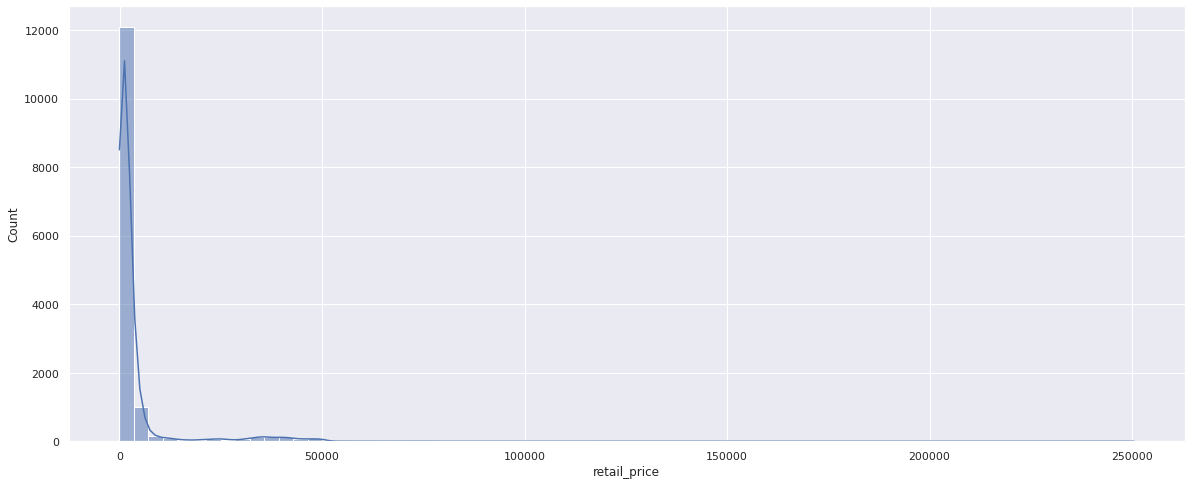

In [20]:
plt.figure(figsize=(20,8))
sns.set(style="darkgrid")
sns.histplot(data=amazon,x="retail_price",kde=True, legend=True,bins=70)

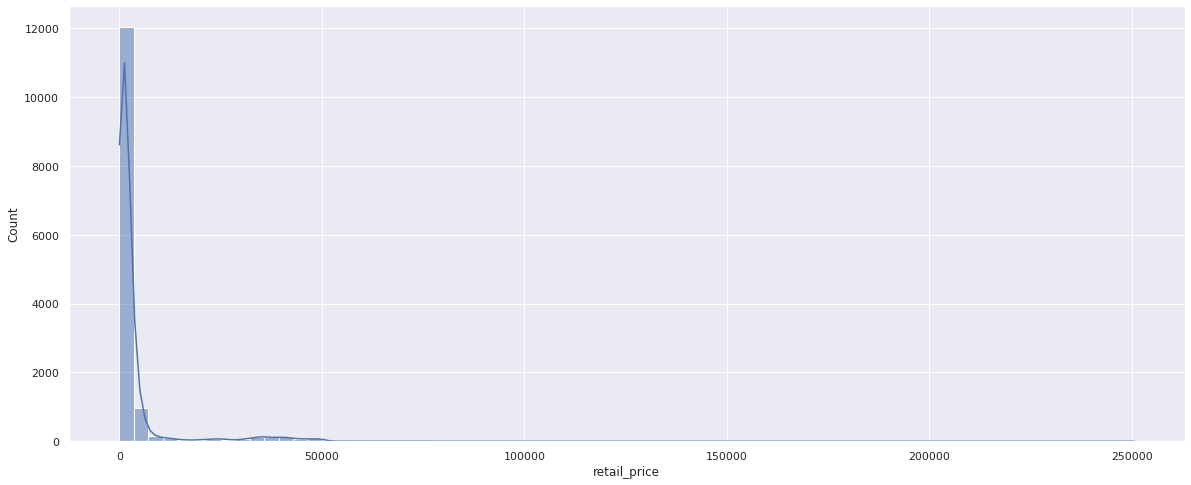

In [21]:
plt.figure(figsize=(20,8))
sns.set(style="darkgrid")
sns.histplot(data=flipkart,x="retail_price",kde=True, legend=True,bins=70)

**DISCOUNT PRICE**

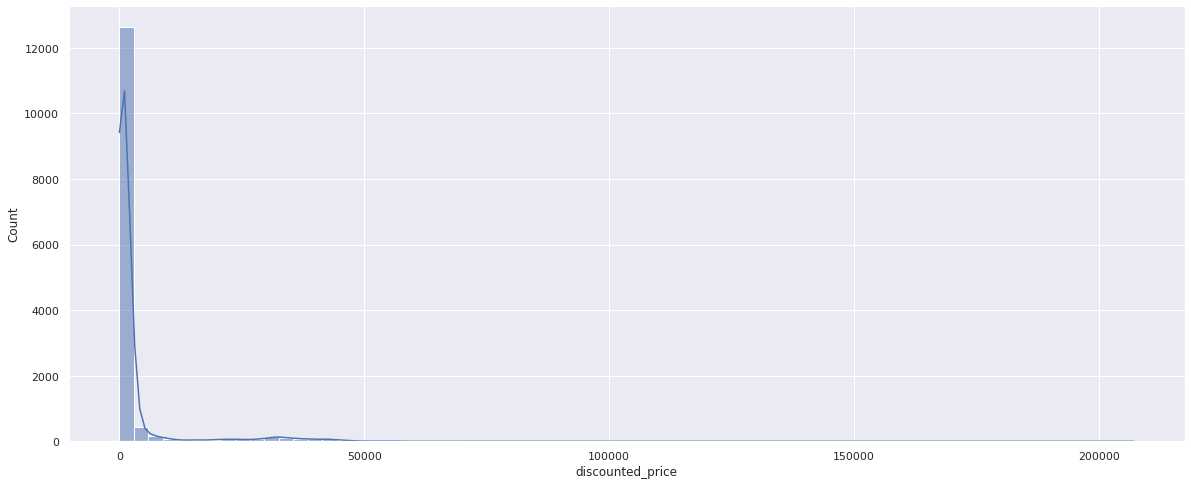

In [22]:
plt.figure(figsize=(20,8))
sns.set(style="darkgrid")
sns.histplot(data=amazon,x="discounted_price",kde=True, legend=True,bins=70)

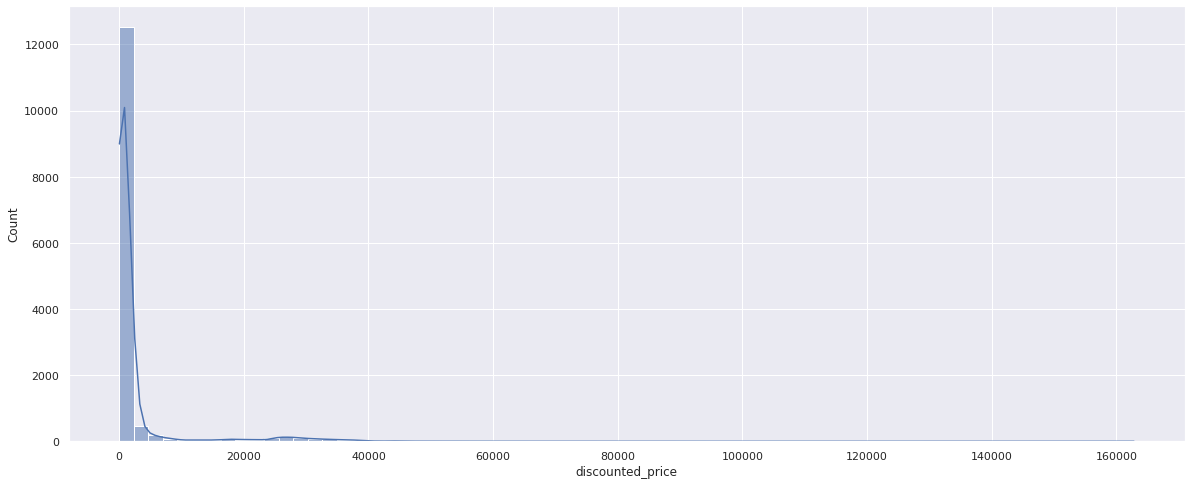

In [23]:
plt.figure(figsize=(20,8))
sns.set(style="darkgrid")
sns.histplot(data=flipkart,x="discounted_price",kde=True, legend=True,bins=70)

**PRODUCT RATING**

In [24]:
amazon["product_rating"].value_counts()

No rating available    13198
5                        341
4                        114
1                         93
3                         71
2                         31
4.2                       31
4.5                       25
3.7                       23
4.3                       21
3.5                       18
2.5                       17
3.6                       13
3.8                       11
4.8                       11
4.1                       11
3.2                       10
2.3                       10
4.4                        9
3.9                        8
3.3                        8
3.4                        7
4.7                        7
4.6                        5
2.8                        4
2.7                        3
2.9                        3
4.9                        3
2.4                        3
2.2                        3
1.5                        2
1.3                        2
3.1                        2
1.7                        1
1.8           

In [25]:
#removing no rating available because we cant plot it
amazon_product_rating=amazon[amazon["product_rating"]!="No rating available"]

In [26]:
amazon_product_rating["product_rating"].value_counts()

5      341
4      114
1       93
3       71
2       31
4.2     31
4.5     25
3.7     23
4.3     21
3.5     18
2.5     17
3.6     13
3.8     11
4.8     11
4.1     11
3.2     10
2.3     10
4.4      9
3.9      8
3.3      8
3.4      7
4.7      7
4.6      5
2.8      4
2.7      3
2.9      3
4.9      3
2.4      3
2.2      3
1.5      2
1.3      2
3.1      2
1.7      1
1.8      1
2.6      1
Name: product_rating, dtype: int64

<ipython-input-27-e6c43f9a6865>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon_product_rating["product_rating"]=pd.to_numeric(amazon_product_rating["product_rating"])


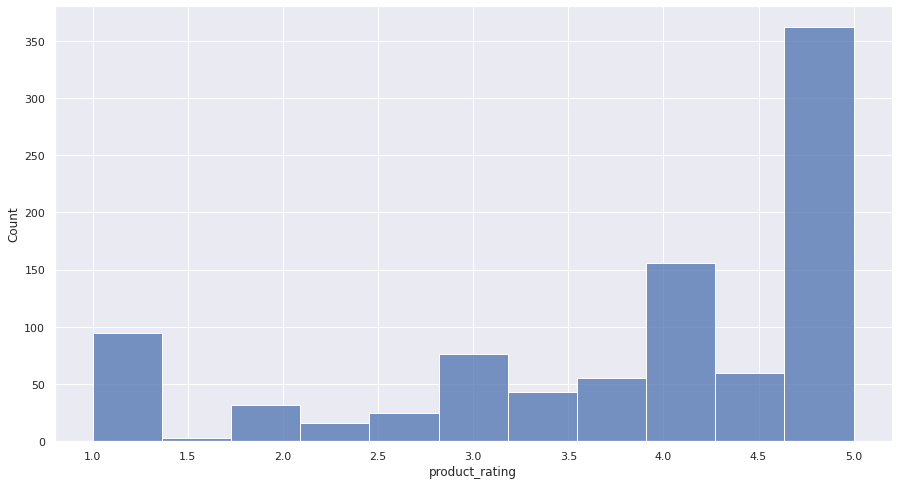

In [27]:
amazon_product_rating["product_rating"]=pd.to_numeric(amazon_product_rating["product_rating"])
plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
sns.histplot(data=amazon_product_rating,x="product_rating", legend=True)

In [28]:
flipkart["product_rating"].value_counts()

No rating available    13140
5                        339
4                        114
1                         91
3                         71
2                         31
4.2                       31
4.5                       25
3.7                       23
4.3                       21
3.5                       18
2.5                       16
3.6                       13
3.8                       11
4.8                       11
4.1                       11
3.2                       10
2.3                       10
4.4                        9
3.9                        8
3.3                        8
3.4                        7
4.7                        7
4.6                        5
2.8                        4
2.7                        3
2.9                        3
4.9                        3
2.4                        3
2.2                        3
1.5                        2
1.3                        2
3.1                        2
1.7                        1
1.8           

In [29]:
#removing no rating available because we cant plot it
flipkart_product_rating=flipkart[flipkart["product_rating"]!="No rating available"]

In [30]:
flipkart_product_rating['product_rating'].value_counts()

5      339
4      114
1       91
3       71
2       31
4.2     31
4.5     25
3.7     23
4.3     21
3.5     18
2.5     16
3.6     13
3.8     11
4.8     11
4.1     11
3.2     10
2.3     10
4.4      9
3.9      8
3.3      8
3.4      7
4.7      7
4.6      5
2.8      4
2.7      3
2.9      3
4.9      3
2.4      3
2.2      3
1.5      2
1.3      2
3.1      2
1.7      1
1.8      1
2.6      1
Name: product_rating, dtype: int64

<ipython-input-31-cbb1a493cf8c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flipkart_product_rating["product_rating"]=pd.to_numeric(flipkart_product_rating["product_rating"])


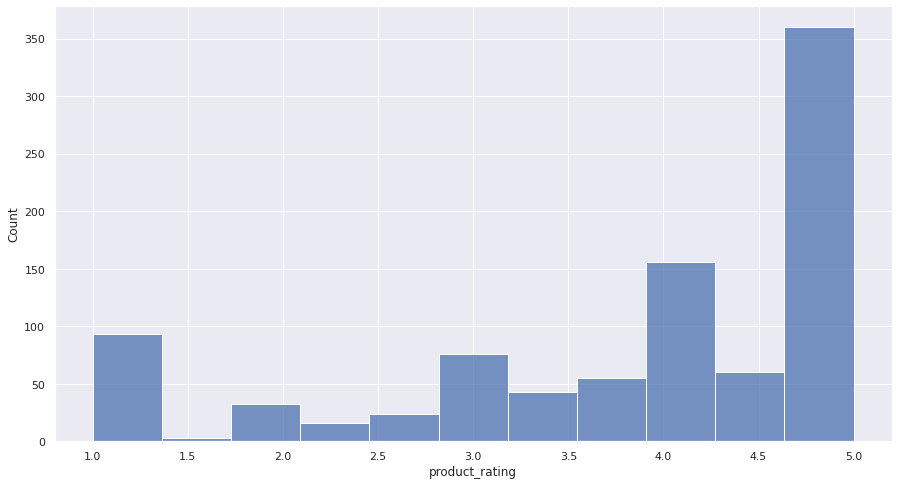

In [31]:
flipkart_product_rating["product_rating"]=pd.to_numeric(flipkart_product_rating["product_rating"])
plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
sns.histplot(data=flipkart_product_rating,x="product_rating", legend=True)

**OVERALL RATING**

In [32]:
amazon["overall_rating"].value_counts()

No rating available    13198
5                        341
4                        114
1                         93
3                         71
2                         31
4.2                       31
4.5                       25
3.7                       23
4.3                       21
3.5                       18
2.5                       17
3.6                       13
3.8                       11
4.8                       11
4.1                       11
3.2                       10
2.3                       10
4.4                        9
3.9                        8
3.3                        8
3.4                        7
4.7                        7
4.6                        5
2.8                        4
2.7                        3
2.9                        3
4.9                        3
2.4                        3
2.2                        3
1.5                        2
1.3                        2
3.1                        2
1.7                        1
1.8           

In [33]:
#removing no rating available because we cant plot it
amazon_overall_rating=amazon[amazon["overall_rating"]!="No rating available"]

amazon_overall_rating["overall_rating"].value_counts()

5      341
4      114
1       93
3       71
2       31
4.2     31
4.5     25
3.7     23
4.3     21
3.5     18
2.5     17
3.6     13
3.8     11
4.8     11
4.1     11
3.2     10
2.3     10
4.4      9
3.9      8
3.3      8
3.4      7
4.7      7
4.6      5
2.8      4
2.7      3
2.9      3
4.9      3
2.4      3
2.2      3
1.5      2
1.3      2
3.1      2
1.7      1
1.8      1
2.6      1
Name: overall_rating, dtype: int64

<ipython-input-34-b3813bd60cfd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon_overall_rating["overall_rating"]=pd.to_numeric(amazon_overall_rating["overall_rating"])


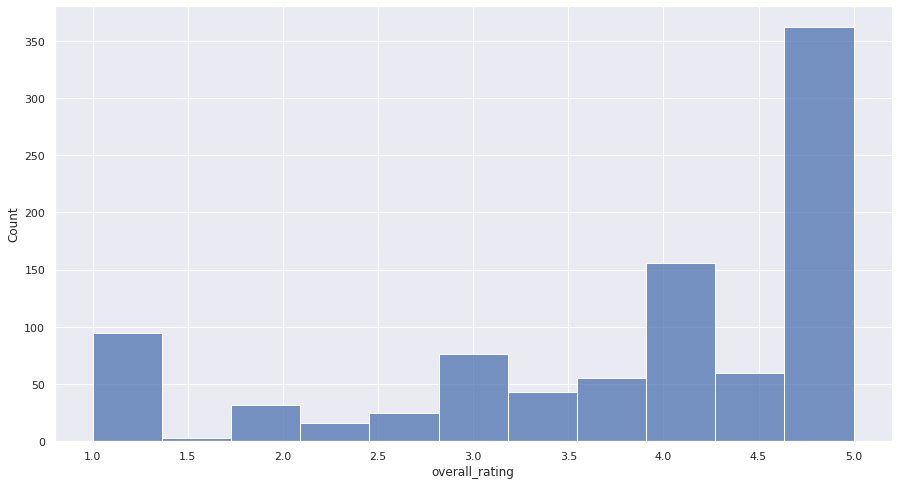

In [34]:
amazon_overall_rating["overall_rating"]=pd.to_numeric(amazon_overall_rating["overall_rating"])
plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
sns.histplot(data=amazon_overall_rating,x="overall_rating", legend=True)

In [35]:
flipkart["overall_rating"].value_counts()

No rating available    13140
5                        339
4                        114
1                         91
3                         71
2                         31
4.2                       31
4.5                       25
3.7                       23
4.3                       21
3.5                       18
2.5                       16
3.6                       13
3.8                       11
4.8                       11
4.1                       11
3.2                       10
2.3                       10
4.4                        9
3.9                        8
3.3                        8
3.4                        7
4.7                        7
4.6                        5
2.8                        4
2.7                        3
2.9                        3
4.9                        3
2.4                        3
2.2                        3
1.5                        2
1.3                        2
3.1                        2
1.7                        1
1.8           

In [36]:
#removing no rating available because we cant plot it
flipkart_overall_rating=flipkart[flipkart["overall_rating"]!="No rating available"]

flipkart_overall_rating["overall_rating"].value_counts()

5      339
4      114
1       91
3       71
2       31
4.2     31
4.5     25
3.7     23
4.3     21
3.5     18
2.5     16
3.6     13
3.8     11
4.8     11
4.1     11
3.2     10
2.3     10
4.4      9
3.9      8
3.3      8
3.4      7
4.7      7
4.6      5
2.8      4
2.7      3
2.9      3
4.9      3
2.4      3
2.2      3
1.5      2
1.3      2
3.1      2
1.7      1
1.8      1
2.6      1
Name: overall_rating, dtype: int64

<ipython-input-37-8f2f7b008468>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flipkart_overall_rating["overall_rating"]=pd.to_numeric(flipkart_overall_rating["overall_rating"])


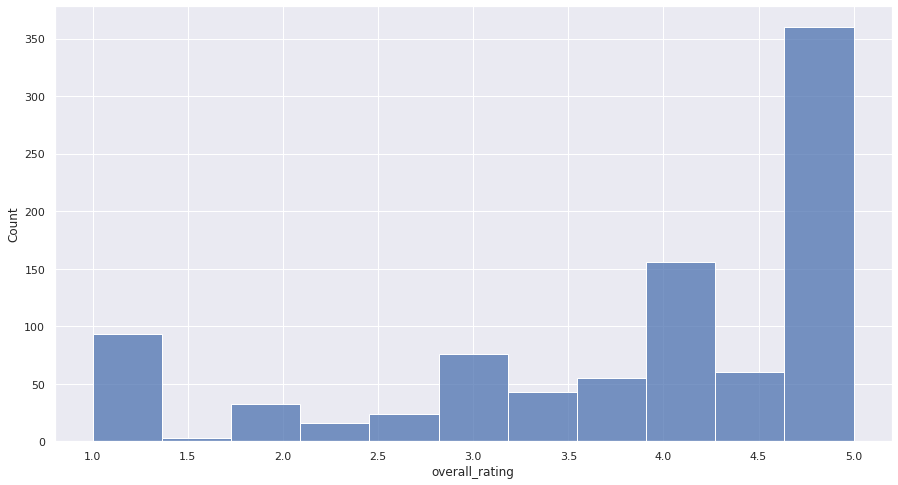

In [37]:
flipkart_overall_rating["overall_rating"]=pd.to_numeric(flipkart_overall_rating["overall_rating"])
plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
sns.histplot(data=flipkart_overall_rating,x="overall_rating", legend=True)

**IS FK ADVANTAGE PRODUCT OR NOT**

In [38]:
amazon["is_FK_Advantage_product"].value_counts()

False    13769
True       352
Name: is_FK_Advantage_product, dtype: int64

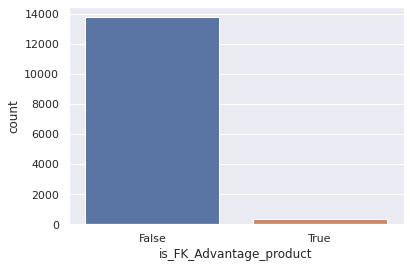

In [39]:
sns.countplot(x ='is_FK_Advantage_product', data = amazon)

In [40]:
flipkart["is_FK_Advantage_product"].value_counts()

False    13722
True       336
Name: is_FK_Advantage_product, dtype: int64

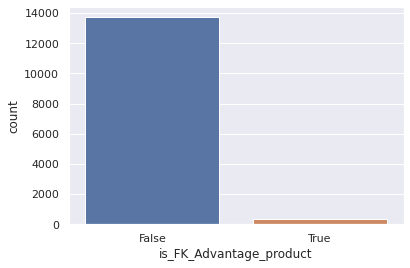

In [41]:
sns.countplot(x ='is_FK_Advantage_product', data = flipkart)

**BRAND**

In [42]:
amazon_L1=list(amazon["brand"].value_counts().keys()[0:30])
amazon_L2=list(amazon["brand"].value_counts().values[0:30])

In [43]:
amazon["brand"].value_counts()

Allure Auto        469
Regular            313
Voylla             299
Slim               288
TheLostPuppy       229
                  ... 
Lucky Thailand       1
Loreal Paris         1
CLASSY               1
ORIFLAME SWEDEN      1
Fun To See           1
Name: brand, Length: 3495, dtype: int64

Text(0, 0.5, 'Brand')

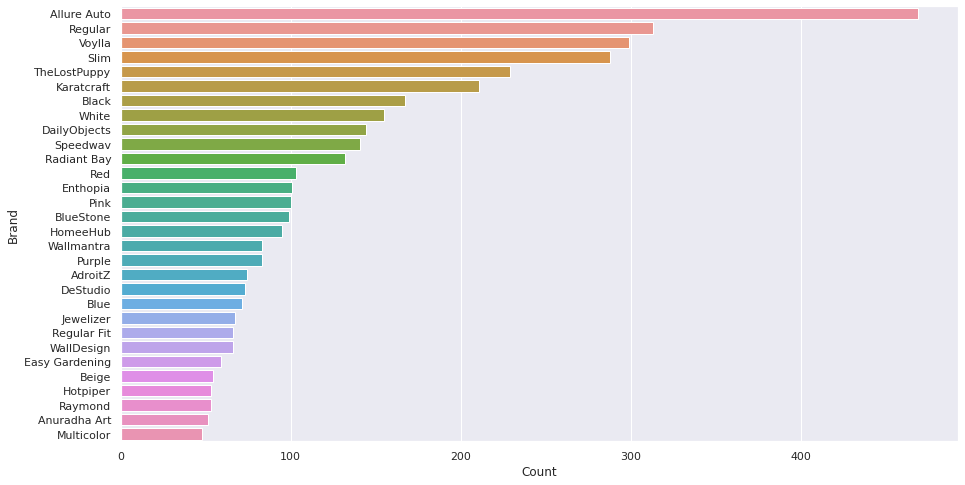

In [44]:
plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
sns.barplot(x=amazon_L2,y=amazon_L1,data=amazon)
plt.xlabel("Count")
plt.ylabel("Brand")

In [45]:
flipkart_L1=list(flipkart["brand"].value_counts().keys()[0:30])
flipkart_L2=list(flipkart["brand"].value_counts().values[0:30])

In [46]:
flipkart["brand"].value_counts()

Allure Auto        468
Regular            308
Voylla             299
Slim               284
TheLostPuppy       229
                  ... 
ORIFLAME SWEDEN      1
Wella                1
Cayman               1
Nineteen             1
Fun To See           1
Name: brand, Length: 3481, dtype: int64

Text(0, 0.5, 'Brand')

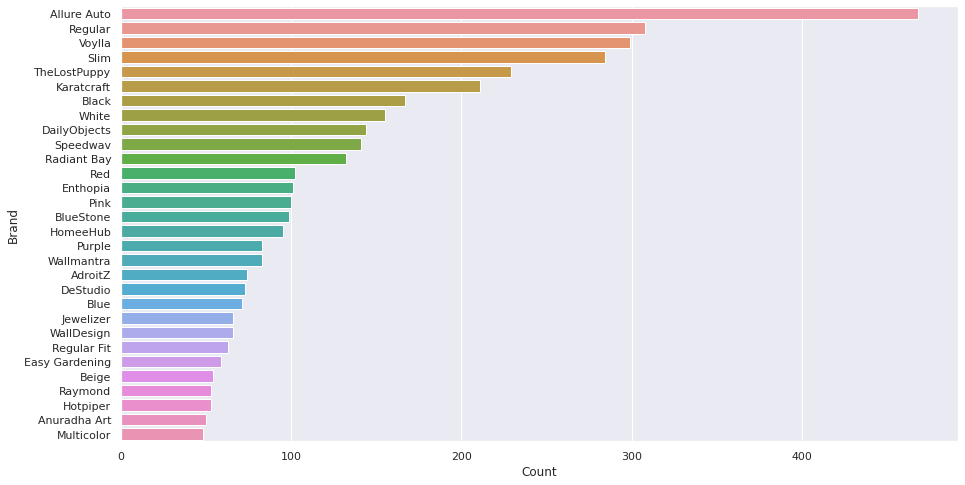

In [47]:
plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
sns.barplot(x=flipkart_L2,y=flipkart_L1,data=flipkart)
plt.xlabel("Count")
plt.ylabel("Brand")

#Merging complete data first

In [48]:
amazon.head(1)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,982,438,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."


In [49]:
flipkart.head(1)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."


In [50]:
#dropping all columns except retail price and product name
amazon1 = amazon.drop(['uniq_id', 'crawl_timestamp','pid','description','product_rating','brand','product_specifications','overall_rating','image','is_FK_Advantage_product','product_category_tree','product_url'], axis=1)
amazon1.columns = ['Product_name_amazon','Retail_price_amazon', 'Discount_price_amazon']
amazon1.head()

,Product_name_amazon,Retail_price_amazon,Discount_price_amazon
0,Alisha Solid Women's Cycling Shorts,982,438
1,FabHomeDecor Fabric Double Sofa Bed,32143,29121
2,AW Bellies,991,551
3,Alisha Solid Women's Cycling Shorts,694,325
4,Sicons All Purpose Arnica Dog Shampoo,208,258


In [51]:
#dropping all columns except retail price and product name
flipkart1  = flipkart.drop(['uniq_id', 'crawl_timestamp','pid','description','product_rating','brand','product_specifications','overall_rating','image','is_FK_Advantage_product','product_category_tree','product_url'], axis=1)
flipkart1.columns = ['Product_name_flipkart','Retail_price_flipkart','Discount_price_flipkart']
flipkart1.head()

,Product_name_flipkart,Retail_price_flipkart,Discount_price_flipkart
0,Alisha Solid Women's Cycling Shorts,999.0,379.0
1,FabHomeDecor Fabric Double Sofa Bed,32157.0,22646.0
2,AW Bellies,999.0,499.0
3,Alisha Solid Women's Cycling Shorts,699.0,267.0
4,Sicons All Purpose Arnica Dog Shampoo,220.0,210.0


In [52]:
#joining the data with product names.
''' while joining we should remember that we're joining the same data type colums from each of the tables/dataframe or else it will give us error '''


joint_data=amazon1.merge(flipkart1,left_on="Product_name_amazon",right_on='Product_name_flipkart',how='inner')

In [53]:
joint_data

,Product_name_amazon,Retail_price_amazon,Discount_price_amazon,Product_name_flipkart,Retail_price_flipkart,Discount_price_flipkart
0,Alisha Solid Women's Cycling Shorts,982,438,Alisha Solid Women's Cycling Shorts,999.0,379.0
1,Alisha Solid Women's Cycling Shorts,982,438,Alisha Solid Women's Cycling Shorts,699.0,267.0
2,Alisha Solid Women's Cycling Shorts,982,438,Alisha Solid Women's Cycling Shorts,1199.0,479.0
3,Alisha Solid Women's Cycling Shorts,982,438,Alisha Solid Women's Cycling Shorts,1199.0,479.0
4,Alisha Solid Women's Cycling Shorts,982,438,Alisha Solid Women's Cycling Shorts,999.0,379.0
...,...,...,...,...,...,...
79162,GEMKOLABWELL G-S-725-14,6586,3967,GEMKOLABWELL G-S-725-14,6590.0,3345.0
79163,LOTTIE LONDON PERFECTLY PRECISE,537,577,LOTTIE LONDON PERFECTLY PRECISE,550.0,495.0
79164,LOTTIE LONDON ALL EYES ON YOU,540,603,LOTTIE LONDON ALL EYES ON YOU,550.0,495.0
79165,LOTTIE LONDON MAKE ME BLUSH,848,943,LOTTIE LONDON MAKE ME BLUSH,850.0,765.0


In [57]:
#removing duplicates
joint_data_1=joint_data.drop_duplicates()
joint_data_1

,Product_name_amazon,Retail_price_amazon,Discount_price_amazon,Product_name_flipkart,Retail_price_flipkart,Discount_price_flipkart
0,Alisha Solid Women's Cycling Shorts,982,438,Alisha Solid Women's Cycling Shorts,999.0,379.0
1,Alisha Solid Women's Cycling Shorts,982,438,Alisha Solid Women's Cycling Shorts,699.0,267.0
2,Alisha Solid Women's Cycling Shorts,982,438,Alisha Solid Women's Cycling Shorts,1199.0,479.0
6,Alisha Solid Women's Cycling Shorts,694,325,Alisha Solid Women's Cycling Shorts,999.0,379.0
7,Alisha Solid Women's Cycling Shorts,694,325,Alisha Solid Women's Cycling Shorts,699.0,267.0
...,...,...,...,...,...,...
79162,GEMKOLABWELL G-S-725-14,6586,3967,GEMKOLABWELL G-S-725-14,6590.0,3345.0
79163,LOTTIE LONDON PERFECTLY PRECISE,537,577,LOTTIE LONDON PERFECTLY PRECISE,550.0,495.0
79164,LOTTIE LONDON ALL EYES ON YOU,540,603,LOTTIE LONDON ALL EYES ON YOU,550.0,495.0
79165,LOTTIE LONDON MAKE ME BLUSH,848,943,LOTTIE LONDON MAKE ME BLUSH,850.0,765.0


In [56]:
'''  
As far as i know, only if the product name is same in both the datasets we can find the intersection or else we can't. 
So I've checked if there are any extra products. 
'''

# AM commenting this as is_equal column is getting added to the original one which misleads the understanding.

#the table is null because all names are same in both cases

'''
joint_data_1['is_equal']= (joint_data_1['Product_name_amazon'].str.lower().str.replace('s/+',"") == joint_data_1['Product_name_flipkart'].str.lower().str.replace('s/+',""))
joint_data_not_matching = joint_data_1[joint_data_1["is_equal"]=='False']
joint_data_not_matching  '''

<ipython-input-56-032dada81cfd>:11: FutureWarning: The default value of regex will change from True to False in a future version.
  joint_data_1['is_equal']= (joint_data_1['Product_name_amazon'].str.lower().str.replace('s/+',"") == joint_data_1['Product_name_flipkart'].str.lower().str.replace('s/+',""))
<ipython-input-56-032dada81cfd>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joint_data_1['is_equal']= (joint_data_1['Product_name_amazon'].str.lower().str.replace('s/+',"") == joint_data_1['Product_name_flipkart'].str.lower().str.replace('s/+',""))


,Product_name_amazon,Retail_price_amazon,Discount_price_amazon,Product_name_flipkart,Retail_price_flipkart,Discount_price_flipkart,is_equal


#METHOD 1: taking input from user and displaying the product prices in both flipkart and amazon

In [58]:
product_name = input('Enter product name:') 
joint_data_1.loc[joint_data_1['Product_name_amazon'] == product_name]

Enter product name:Alisha Solid Women's Cycling Shorts


,Product_name_amazon,Retail_price_amazon,Discount_price_amazon,Product_name_flipkart,Retail_price_flipkart,Discount_price_flipkart
0,Alisha Solid Women's Cycling Shorts,982,438,Alisha Solid Women's Cycling Shorts,999.0,379.0
1,Alisha Solid Women's Cycling Shorts,982,438,Alisha Solid Women's Cycling Shorts,699.0,267.0
2,Alisha Solid Women's Cycling Shorts,982,438,Alisha Solid Women's Cycling Shorts,1199.0,479.0
6,Alisha Solid Women's Cycling Shorts,694,325,Alisha Solid Women's Cycling Shorts,999.0,379.0
7,Alisha Solid Women's Cycling Shorts,694,325,Alisha Solid Women's Cycling Shorts,699.0,267.0
8,Alisha Solid Women's Cycling Shorts,694,325,Alisha Solid Women's Cycling Shorts,1199.0,479.0
12,Alisha Solid Women's Cycling Shorts,1198,602,Alisha Solid Women's Cycling Shorts,999.0,379.0
13,Alisha Solid Women's Cycling Shorts,1198,602,Alisha Solid Women's Cycling Shorts,699.0,267.0
14,Alisha Solid Women's Cycling Shorts,1198,602,Alisha Solid Women's Cycling Shorts,1199.0,479.0
18,Alisha Solid Women's Cycling Shorts,1197,542,Alisha Solid Women's Cycling Shorts,999.0,379.0


In [59]:
joint_data_1.loc[joint_data_1['Product_name_amazon'] == product_name].shape

(18, 6)

In [60]:
#re checking if we will get same result if we take the product name for flipkart. 
#It will be true as we have already checked the names are same or not

joint_data_1.loc[joint_data_1['Product_name_flipkart'] == product_name].shape

(18, 6)

#METHOD 2: Creating a form and asking for user input then displaying the product price in both amazon and flipkart

In [61]:
#@title AMAZON PRICE vs FLIPKART PRICE
product_name = "Alisha Solid Women's Cycling Shorts" #@param {type:"string"}
joint_data_1.loc[joint_data_1['Product_name_amazon'] == product_name]

,Product_name_amazon,Retail_price_amazon,Discount_price_amazon,Product_name_flipkart,Retail_price_flipkart,Discount_price_flipkart
0,Alisha Solid Women's Cycling Shorts,982,438,Alisha Solid Women's Cycling Shorts,999.0,379.0
1,Alisha Solid Women's Cycling Shorts,982,438,Alisha Solid Women's Cycling Shorts,699.0,267.0
2,Alisha Solid Women's Cycling Shorts,982,438,Alisha Solid Women's Cycling Shorts,1199.0,479.0
6,Alisha Solid Women's Cycling Shorts,694,325,Alisha Solid Women's Cycling Shorts,999.0,379.0
7,Alisha Solid Women's Cycling Shorts,694,325,Alisha Solid Women's Cycling Shorts,699.0,267.0
8,Alisha Solid Women's Cycling Shorts,694,325,Alisha Solid Women's Cycling Shorts,1199.0,479.0
12,Alisha Solid Women's Cycling Shorts,1198,602,Alisha Solid Women's Cycling Shorts,999.0,379.0
13,Alisha Solid Women's Cycling Shorts,1198,602,Alisha Solid Women's Cycling Shorts,699.0,267.0
14,Alisha Solid Women's Cycling Shorts,1198,602,Alisha Solid Women's Cycling Shorts,1199.0,479.0
18,Alisha Solid Women's Cycling Shorts,1197,542,Alisha Solid Women's Cycling Shorts,999.0,379.0


#Suggesting least price from both websites

In [62]:
product_name_1 = input('enter a product name: ')
suggestion_amazon = amazon1.loc[amazon1['Product_name_amazon']==product_name_1] 


suggestion_amazon = suggestion_amazon[suggestion_amazon.Discount_price_amazon == suggestion_amazon.Discount_price_amazon.min()]
suggestion_amazon

enter a product name: Alisha Solid Women's Cycling Shorts


,Product_name_amazon,Retail_price_amazon,Discount_price_amazon
3,Alisha Solid Women's Cycling Shorts,694,325


In [63]:
product_name_2 = input('enter a product name: ')
suggestion_flipkart = flipkart1.loc[flipkart1['Product_name_flipkart']==product_name_1] 


suggestion_flipkart = suggestion_flipkart[suggestion_flipkart.Discount_price_flipkart == suggestion_flipkart.Discount_price_flipkart.min()]
suggestion_flipkart

enter a product name: Alisha Solid Women's Cycling Shorts


,Product_name_flipkart,Retail_price_flipkart,Discount_price_flipkart
3,Alisha Solid Women's Cycling Shorts,699.0,267.0


In [64]:
join_suggestion = suggestion_amazon.merge(suggestion_flipkart,left_on="Product_name_amazon",right_on='Product_name_flipkart',how='inner')
join_suggestion

,Product_name_amazon,Retail_price_amazon,Discount_price_amazon,Product_name_flipkart,Retail_price_flipkart,Discount_price_flipkart
0,Alisha Solid Women's Cycling Shorts,694,325,Alisha Solid Women's Cycling Shorts,699.0,267.0
